In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
x = df.iloc[:,:-1]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
y = df.iloc[:,-1]
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Years of Experience vs Salary')

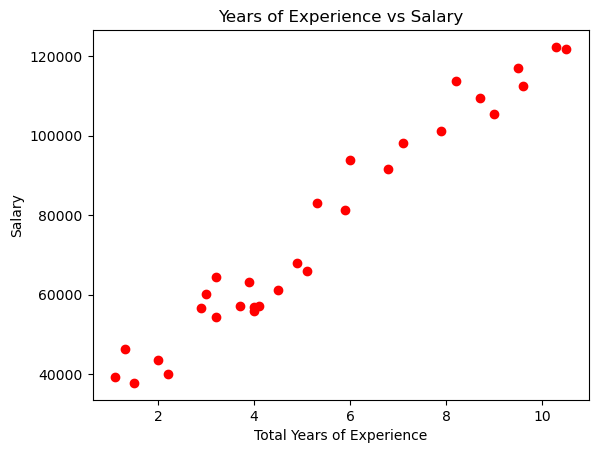

In [7]:
plt.scatter(x, y, color='r')
plt.xlabel('Total Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')

In [8]:
#training the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
x_train.head()

,YearsExperience
21,7.1
11,4.0
4,2.2
8,3.2
17,5.3


In [9]:
#Model creation

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)
y_pred

array([ 41534.28694465,  74999.23127173,  83365.46735351,  69421.74055055,
        73140.06769801,  65703.4134031 ,  90802.12164841,  46182.19587897,
       125196.64776236])

In [11]:
y_test

2      37731.0
16     66029.0
19     93940.0
14     61111.0
15     67938.0
13     57081.0
20     91738.0
3      43525.0
29    121872.0
Name: Salary, dtype: float64

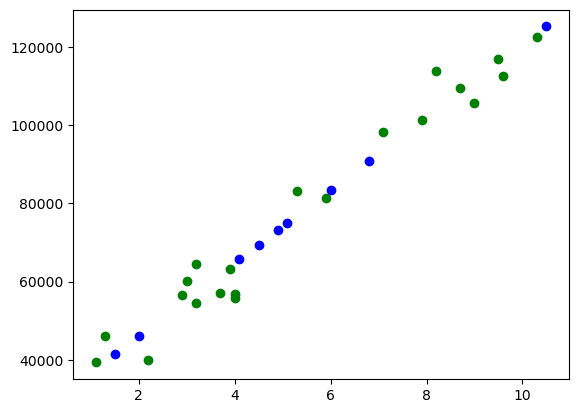

In [12]:
plt.scatter(x_train, y_train, color='g')
plt.scatter(x_test, y_pred, color='b')

In [13]:
print(model.predict([[3]]))

[55478.0137476]


C:\Users\omprakash.n\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
#Comparing the actual and predicted values

df1 = pd.DataFrame({'Actual_Value' : y_test, 'Predicted_Value' : y_pred, 'Difference' : y_test-y_pred})
df1.head()

,Actual_Value,Predicted_Value,Difference
2,37731.0,41534.286945,-3803.286945
16,66029.0,74999.231272,-8970.231272
19,93940.0,83365.467354,10574.532646
14,61111.0,69421.740551,-8310.740551
15,67938.0,73140.067698,-5202.067698


In [15]:
from sklearn.metrics import r2_score
print("R2 score is:", r2_score(y_test, y_pred))

R2 score is: 0.9308662451595101
